# XGBoost and AdaBoost ensemble (voting classifier) with all features of the prepared files

In [62]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklift.models import ClassTransformation
from sklift import metrics
from sklift.viz import plot_qini_curve
import chime
from sklearn.tree import DecisionTreeClassifier


In [22]:
%load_ext chime

The chime extension is already loaded. To reload it, use:
  %reload_ext chime


In [23]:
clients = pd.read_csv('clients_train_modified.csv', index_col='client_id')
clients

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
000012768d,6.425000,25.7,0.000,0.0,0.000000,0.0,0.000000,0.0,700.750000,2803.00,17383,17535,45.000000,0,0,0
000036f903,1.715625,54.9,1.875,60.0,0.000000,0.0,0.000000,0.0,306.406250,9805.00,17266,17279,72.000000,1,0,0
0001f552b0,5.260000,78.9,0.000,0.0,0.000000,0.0,0.000000,0.0,410.345333,6155.18,17347,17771,33.000000,1,0,0
00020e7b18,15.894444,286.1,0.000,0.0,-32.888889,-592.0,-1.666667,-30.0,1434.422778,25819.61,17497,17541,73.000000,0,0,0
000220a0a7,6.940000,104.1,0.000,0.0,0.000000,0.0,0.000000,0.0,573.771333,8606.57,17509,17808,46.379533,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd5cd0c6,1.950000,35.1,0.000,0.0,0.000000,0.0,0.000000,0.0,318.423889,5731.63,17343,17797,47.000000,0,1,0
fffd63dfe3,1.625000,6.5,0.000,0.0,0.000000,0.0,0.000000,0.0,335.127500,1340.51,17312,17578,31.000000,0,0,0
fffd8c9d7d,2.200000,11.0,0.000,0.0,0.000000,0.0,0.000000,0.0,327.306000,1636.53,17582,17712,48.000000,1,0,0


In [24]:
x_cols = clients.columns

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(clients)

StandardScaler()

In [27]:
clients_scaled = pd.DataFrame(scaler.transform(clients),
                              columns=x_cols,
                             index=clients.index)
clients_scaled

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
000012768d,0.326493,-0.544865,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,0.547587,-0.653612,-0.771133,-0.856385,-0.087757,-0.763412,-0.449111,-0.311067
000036f903,-0.597875,-0.239623,3.369176,7.499476,0.433102,0.563999,0.246932,0.395964,-0.504430,0.138021,-1.344979,-1.862848,1.615961,1.309908,-0.449111,-0.311067
0001f552b0,0.097824,0.011260,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.227145,-0.274621,-0.947701,0.071448,-0.844965,1.309908,-0.449111,-0.311067
00020e7b18,2.185181,2.177224,-0.072084,-0.102507,-3.206022,-4.001476,-0.403913,-1.443925,2.504855,1.948604,-0.212002,-0.832796,1.679061,-0.763412,-0.449111,-0.311067
000220a0a7,0.427579,0.274688,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,0.208837,0.002529,-0.153146,0.216913,-0.000708,-0.763412,2.226620,-0.311067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffd5cd0c6,-0.551871,-0.446602,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.472370,-0.322507,-0.967320,0.173667,0.038444,-0.763412,2.226620,-0.311067
fffd63dfe3,-0.615663,-0.745572,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.427809,-0.818959,-1.119365,-0.687331,-0.971167,-0.763412,-0.449111,-0.311067
fffd8c9d7d,-0.502801,-0.698532,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.448675,-0.785491,0.204895,-0.160510,0.101545,1.309908,-0.449111,-0.311067


In [28]:
df_full = pd.read_csv('train.csv', index_col='client_id')\
    .join(clients_scaled, how='left')
df_full

,treatment_flg,purchased,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,,,
ad6561e2d8,1,1,-0.457165,0.203605,-0.072084,-0.102507,0.256063,0.070434,0.246932,0.395964,-0.601460,0.250673,-0.182574,-0.309907,0.227746,1.309908,-0.449111,-0.311067
7c1ccbf93f,1,1,-0.012094,-0.715257,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.186716,-0.874302,-0.295381,-0.663742,-1.412871,1.309908,-0.449111,-0.311067
b58fadcab6,1,1,-0.390384,0.142974,-0.072084,-0.102507,-0.602976,-1.818994,0.246932,0.395964,-0.176185,0.631720,-0.334618,0.142215,-0.655663,-0.763412,-0.449111,-0.311067
e99e6fabb9,0,0,-0.729281,-0.671353,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.732479,-0.645811,0.621791,-0.282386,2.057665,1.309908,-0.449111,-0.311067
27fb6f8520,1,1,-0.396808,0.045757,1.151475,2.431487,0.418348,0.533151,-0.403913,-2.670518,-0.442714,0.147202,-0.864322,-0.935015,-0.781865,1.309908,-0.449111,-0.311067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999d284453,1,1,0.758315,-0.452875,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,0.664302,-0.633827,1.445775,0.940309,1.615961,-0.763412,-0.449111,-0.311067
f634deea4e,0,1,-0.721304,-0.211399,-0.072084,-0.102507,0.238944,-0.153212,0.246932,0.395964,-0.790863,0.222140,0.126420,-0.592975,-0.718764,-0.763412,-0.449111,-0.311067
16cb4f99b0,0,1,-0.250437,-0.558455,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.125167,-0.615512,0.219609,1.156541,0.227746,1.309908,-0.449111,-0.311067


In [29]:
indices_train, indices_val = train_test_split(df_full.index, 
                                              test_size=0.2, 
                                              random_state=8)

In [30]:
indices_train.shape

(112021,)

In [31]:
indices_val.shape

(28006,)

In [32]:
X_train = df_full.loc[indices_train, x_cols]
X_train

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
fd1ab717e8,-0.344139,0.318593,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.674769,0.016709,1.146590,0.881336,1.426659,1.309908,-0.449111,-0.311067
5be3f83065,1.015586,0.640561,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,0.588284,0.162789,1.852862,1.113294,1.300457,1.309908,-0.449111,-0.311067
1c48fc99b2,-0.516362,0.411629,-0.072084,-0.102507,0.189674,-0.369147,0.246932,0.395964,-0.434654,1.097419,-1.085032,-1.548328,0.732551,1.309908,-0.449111,-0.311067
fcce9d3197,-0.494128,0.195242,-0.072084,-0.102507,0.026531,-0.654489,0.246932,0.395964,-0.421486,0.670231,-0.834894,-1.438246,-0.213959,-0.763412,-0.449111,-0.311067
4f43f48cb7,0.950368,2.097777,-0.072084,-0.102507,-1.280050,-2.898667,0.246932,0.395964,0.928971,1.795747,-0.761324,0.350584,-0.277059,-0.763412,-0.449111,-0.311067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c5792264c8,-0.157904,0.055165,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.004736,0.201673,-0.570042,-0.805275,1.237357,-0.763412,-0.449111,-0.311067
84880145bd,0.233598,0.990752,-0.072084,-0.102507,-0.169745,-0.654489,0.246932,0.395964,-0.053363,0.588458,1.740055,0.692624,-0.718764,-0.763412,2.226620,-0.311067
49eb365a88,-0.179916,-0.009647,-0.072084,-0.102507,-0.479753,-0.708473,0.246932,0.395964,-0.210638,-0.028665,-1.065413,-0.734508,-1.665274,-0.763412,2.226620,-0.311067


In [33]:
treat_train = df_full.loc[indices_train, 'treatment_flg']
treat_train

client_id
fd1ab717e8    1
5be3f83065    1
1c48fc99b2    0
fcce9d3197    1
4f43f48cb7    0
             ..
c5792264c8    0
84880145bd    0
49eb365a88    0
1b55a9f080    1
9961481e46    1
Name: treatment_flg, Length: 112021, dtype: int64

In [34]:
y_train = df_full.loc[indices_train, 'purchased']
y_train

client_id
fd1ab717e8    1
5be3f83065    0
1c48fc99b2    1
fcce9d3197    1
4f43f48cb7    1
             ..
c5792264c8    1
84880145bd    1
49eb365a88    0
1b55a9f080    0
9961481e46    1
Name: purchased, Length: 112021, dtype: int64

In [35]:
X_val = df_full.loc[indices_val, x_cols]
X_val

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
c0582c1d5e,-0.632076,-0.346249,-0.072084,-0.102507,-0.081989,-0.477114,0.246932,0.395964,-0.650816,-0.145813,0.146039,-0.018976,0.606350,-0.763412,-0.449111,-0.311067
9a96a00f1d,3.342703,4.653655,-0.072084,-0.102507,-1.166699,-2.112048,0.246932,0.395964,4.101678,4.545778,-0.839799,-1.064754,1.111155,1.309908,-0.449111,-0.311067
55bca71943,1.087089,-0.490507,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,1.695660,-0.586874,0.494270,1.836689,-0.908066,-0.763412,-0.449111,3.214739
5bb5a27171,-0.332497,0.276779,-0.072084,-0.102507,-0.689661,-2.096624,0.246932,0.395964,-0.494773,0.221219,-0.918273,-1.284918,-0.340160,1.309908,-0.449111,-0.311067
d9c7b97fba,-0.322875,-0.031599,-0.072084,-0.102507,-0.203130,-0.500250,0.246932,0.395964,-0.202260,0.168226,-1.065413,0.708350,-0.277059,-0.763412,2.226620,-0.311067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
f68c84f07b,-0.460273,-0.358793,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.239603,-0.144946,1.504631,1.836689,-1.728375,-0.763412,2.226620,3.214739
704cff2628,-0.720892,-0.711076,-0.072084,-0.102507,0.383924,0.533151,-1.054759,-1.443925,-0.743242,-0.749825,-0.055052,-0.431783,-0.277059,-0.763412,-0.449111,-0.311067
feff930002,-0.559068,-0.213490,-0.072084,-0.102507,-0.145962,-0.646777,0.246932,0.395964,-0.497624,0.077391,-0.829989,-0.667673,-1.097368,1.309908,-0.449111,-0.311067


In [36]:
treat_val = df_full.loc[indices_val, 'treatment_flg']
treat_val

client_id
c0582c1d5e    1
9a96a00f1d    0
55bca71943    0
5bb5a27171    0
d9c7b97fba    0
             ..
f68c84f07b    0
704cff2628    1
feff930002    1
fa31a8a3bb    0
cf760d447c    1
Name: treatment_flg, Length: 28006, dtype: int64

In [37]:
y_val = df_full.loc[indices_val, 'purchased']
y_val

client_id
c0582c1d5e    1
9a96a00f1d    1
55bca71943    0
5bb5a27171    1
d9c7b97fba    0
             ..
f68c84f07b    1
704cff2628    1
feff930002    1
fa31a8a3bb    0
cf760d447c    1
Name: purchased, Length: 28006, dtype: int64

# Model

In [38]:
clf1 = XGBClassifier(random_state=8, 
                     use_label_encoder=False,
                     learning_rate=0.1,
                     max_depth=2,
                     n_estimators=50,
                     reg_alpha=0,
                     reg_lambda=0.05)

In [41]:
clf2 = AdaBoostClassifier(random_state=8,
                              base_estimator=DecisionTreeClassifier(random_state=8, 
                                                                    max_depth=2),
                               learning_rate=0.5,
                               n_estimators=15
                              )

In [42]:
estimator = VotingClassifier(estimators=[('xgboost', clf1), ('ada', clf2)],
                             voting='soft',
                            verbose=True)

In [43]:
model = ClassTransformation(estimator = estimator)

In [44]:
%%time
%%chime
model = model.fit(X_train, y_train, treat_train)

/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:02:25] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Voting] .................. (1 of 2) Processing xgboost, total=   0.9s
[Voting] ...................... (2 of 2) Processing ada, total=   2.7s
CPU times: user 6.78 s, sys: 81.3 ms, total: 6.86 s
Wall time: 3.65 s


# Results for the train set

In [45]:
y_pred_train = model.predict(X_train)
y_pred_train

array([ 0.27991729, -0.01141687,  0.01902056, ...,  0.00047329,
        0.01762069,  0.02692879])

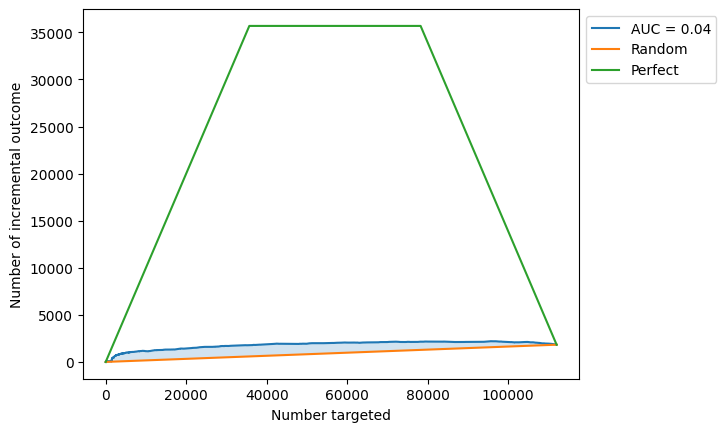

In [46]:
plot_qini_curve(y_train, y_pred_train, treat_train);

In [47]:
metrics.qini_auc_score(y_train, y_pred_train, treat_train)

0.03750934028966127

# Results for the validation set

In [48]:
y_pred_val = model.predict(X_val)
y_pred_val

array([ 0.02356792,  0.02350514, -0.00268613, ...,  0.00179106,
        0.02863443,  0.00776558])

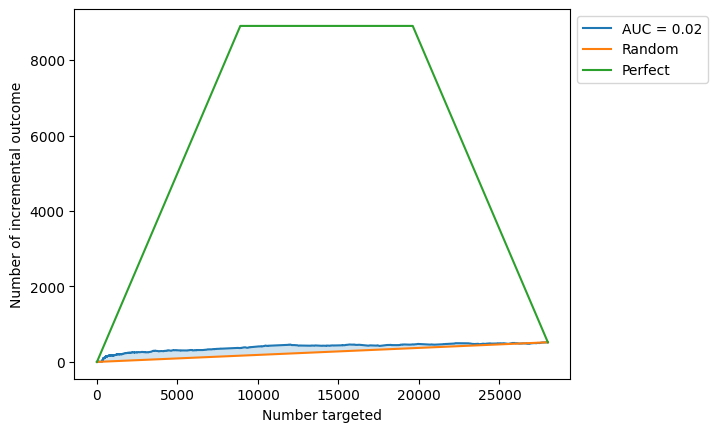

In [49]:
plot_qini_curve(y_val, y_pred_val, treat_val);

In [50]:
metrics.qini_auc_score(y_val, y_pred_val, treat_val)

0.023193582710858886

#  Cross-validation on the full train set

In [51]:
X_full = df_full.loc[:, x_cols]
X_full

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
ad6561e2d8,-0.457165,0.203605,-0.072084,-0.102507,0.256063,0.070434,0.246932,0.395964,-0.601460,0.250673,-0.182574,-0.309907,0.227746,1.309908,-0.449111,-0.311067
7c1ccbf93f,-0.012094,-0.715257,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.186716,-0.874302,-0.295381,-0.663742,-1.412871,1.309908,-0.449111,-0.311067
b58fadcab6,-0.390384,0.142974,-0.072084,-0.102507,-0.602976,-1.818994,0.246932,0.395964,-0.176185,0.631720,-0.334618,0.142215,-0.655663,-0.763412,-0.449111,-0.311067
e99e6fabb9,-0.729281,-0.671353,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.732479,-0.645811,0.621791,-0.282386,2.057665,1.309908,-0.449111,-0.311067
27fb6f8520,-0.396808,0.045757,1.151475,2.431487,0.418348,0.533151,-0.403913,-2.670518,-0.442714,0.147202,-0.864322,-0.935015,-0.781865,1.309908,-0.449111,-0.311067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999d284453,0.758315,-0.452875,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,0.664302,-0.633827,1.445775,0.940309,1.615961,-0.763412,-0.449111,-0.311067
f634deea4e,-0.721304,-0.211399,-0.072084,-0.102507,0.238944,-0.153212,0.246932,0.395964,-0.790863,0.222140,0.126420,-0.592975,-0.718764,-0.763412,-0.449111,-0.311067
16cb4f99b0,-0.250437,-0.558455,-0.072084,-0.102507,0.433102,0.563999,0.246932,0.395964,-0.125167,-0.615512,0.219609,1.156541,0.227746,1.309908,-0.449111,-0.311067


In [52]:
treat_full = df_full.loc[:, 'treatment_flg']
treat_full

client_id
ad6561e2d8    1
7c1ccbf93f    1
b58fadcab6    1
e99e6fabb9    0
27fb6f8520    1
             ..
999d284453    1
f634deea4e    0
16cb4f99b0    0
23c2b72b2e    1
1430184499    0
Name: treatment_flg, Length: 140027, dtype: int64

In [53]:
y_full = df_full.loc[:, 'purchased']
y_full

client_id
ad6561e2d8    1
7c1ccbf93f    1
b58fadcab6    1
e99e6fabb9    0
27fb6f8520    1
             ..
999d284453    1
f634deea4e    1
16cb4f99b0    1
23c2b72b2e    1
1430184499    1
Name: purchased, Length: 140027, dtype: int64

In [54]:
clf1 = XGBClassifier(random_state=8, 
                     use_label_encoder=False,
                     learning_rate=0.1,
                     max_depth=2,
                     n_estimators=50,
                     reg_alpha=0,
                     reg_lambda=0.05)

In [55]:
clf2 = AdaBoostClassifier(random_state=8,
                              base_estimator=DecisionTreeClassifier(random_state=8, 
                                                                    max_depth=2),
                               learning_rate=0.5,
                               n_estimators=15
                              )

In [56]:
estimator = VotingClassifier(estimators=[('xgboost', clf1), ('ada', clf2)],
                             voting='soft',
                            verbose=True)

In [57]:
model_full = ClassTransformation(estimator = estimator)

In [59]:
uplift_scorer = metrics.make_uplift_scorer("qini_auc_score", treat_full)

In [60]:
params = {}

In [64]:
grid_search = GridSearchCV(model,
                           param_grid=params,
                           scoring=uplift_scorer,
                           cv=10,
                           verbose=4
                          )

In [65]:
%%time
%%chime
grid_search = grid_search.fit(
    X=X_full,
    y=y_full,
    treatment=treat_full
)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[16:24:07] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[Voting] .................. (1 of 2) Processing xgboost, total=   1.0s
[Voting] ...................... (2 of 2) Processing ada, total=   3.0s
[CV 1/10] END .................................., score=0.016 total time=   4.2s
[16:24:11] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[Voting] .................. (1 of 2) Processing xgboost, total=   1.0s
[Voting] ...................... (2 of 2) Processing ada, total=   3.0s
[CV 2/10] END .................................., score=0.023 total time=   4.1s
[16:24:16] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[Voting] .................. (1 of 2) Processing xgboost, total=   1.0s
[Voting] ...................... (2 of 2) Processing ada, total=   3.0s
[CV 3/10] END .................................., score=0.019 total time=   4.1s
[16:24:20] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[Voting] .................. (1 of 2) Processing xgboost, total=   1.0s
[Voting] ...................... (2 of 2) Processing ada, total=   3.0s
[CV 4/10] END .................................., score=0.030 total time=   4.1s
[16:24:24] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[Voting] .................. (1 of 2) Processing xgboost, total=   1.0s
[Voting] ...................... (2 of 2) Processing ada, total=   3.0s
[CV 5/10] END .................................., score=0.037 total time=   4.1s
[16:24:28] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[Voting] .................. (1 of 2) Processing xgboost, total=   1.0s
[Voting] ...................... (2 of 2) Processing ada, total=   3.0s
[CV 6/10] END .................................., score=0.014 total time=   4.1s
[16:24:32] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[Voting] .................. (1 of 2) Processing xgboost, total=   1.0s
[Voting] ...................... (2 of 2) Processing ada, total=   3.0s
[CV 7/10] END .................................., score=0.025 total time=   4.1s
[16:24:36] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[Voting] .................. (1 of 2) Processing xgboost, total=   1.0s
[Voting] ...................... (2 of 2) Processing ada, total=   2.9s
[CV 8/10] END .................................., score=0.028 total time=   4.0s
[16:24:40] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[Voting] .................. (1 of 2) Processing xgboost, total=   1.0s
[Voting] ...................... (2 of 2) Processing ada, total=   3.0s
[CV 9/10] END .................................., score=0.023 total time=   4.1s
[16:24:44] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[Voting] .................. (1 of 2) Processing xgboost, total=   1.0s
[Voting] ...................... (2 of 2) Processing ada, total=   3.0s
[CV 10/10] END ................................., score=0.028 total time=   4.1s
[16:24:48] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[Voting] .................. (1 of 2) Processing xgboost, total=   1.1s
[Voting] ...................... (2 of 2) Processing ada, total=   3.4s
CPU times: user 1min 26s, sys: 1.05 s, total: 1min 27s
Wall time: 45.7 s


In [66]:
grid_search.best_score_

0.02434378157419581

In [68]:
%%time
model_full = model_full.fit(X_full, y_full, treat_full)

/home/denis/MyCode/Git/Kaggle_CFT/env/lib/python3.10/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[16:30:51] WARNING: /tmp/abs_40obctay9q/croots/recipe/xgboost-split_1659548945886/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[Voting] .................. (1 of 2) Processing xgboost, total=   1.1s
[Voting] ...................... (2 of 2) Processing ada, total=   3.5s
CPU times: user 8.4 s, sys: 79.6 ms, total: 8.48 s
Wall time: 4.66 s


Prediction

In [69]:
X_test = pd.read_csv('clients_test_modified.csv', index_col='client_id')
X_test

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,,,,,,,,,,,
00010925a5,1.766667,31.8,0.0,0.0,-0.944444,-17.0,0.000000,0.0,326.833333,5883.00,17736,17788,83.0,0,0,0
00035a21d9,7.866667,23.6,0.0,0.0,-2.666667,-8.0,-10.000000,-30.0,597.313333,1791.94,17936,17957,69.0,0,0,0
00038f9200,1.725000,82.8,0.0,0.0,-0.604167,-29.0,0.000000,0.0,174.687500,8385.00,17872,17908,79.0,0,0,0
0004315e57,4.842857,67.8,0.0,0.0,-2.785714,-39.0,-4.285714,-60.0,542.142857,7590.00,17860,17929,38.0,0,0,0
0006fca4bf,11.800000,35.4,0.0,0.0,0.000000,0.0,0.000000,0.0,713.666667,2141.00,17947,18220,57.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff9aa288c,4.210000,42.1,0.0,0.0,-4.600000,-46.0,0.000000,0.0,494.211000,4942.11,17854,17962,48.0,0,0,0
fff9f772f6,23.975000,95.9,0.0,0.0,0.000000,0.0,0.000000,0.0,1563.815000,6255.26,17372,17977,54.0,1,0,0
fffe0ed719,2.330000,69.9,0.0,0.0,0.000000,0.0,0.000000,0.0,347.249333,10417.48,17424,17512,69.0,0,0,0


In [70]:
y_pred_test = model_full.predict(X_test); y_pred_test

array([-0.09198497,  0.07783813, -0.09198497, ..., -0.09198497,
       -0.09008929,  0.00999544])

In [71]:
X_test['pred'] = y_pred_test
X_test

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem,pred
client_id,,,,,,,,,,,,,,,,,
00010925a5,1.766667,31.8,0.0,0.0,-0.944444,-17.0,0.000000,0.0,326.833333,5883.00,17736,17788,83.0,0,0,0,-0.091985
00035a21d9,7.866667,23.6,0.0,0.0,-2.666667,-8.0,-10.000000,-30.0,597.313333,1791.94,17936,17957,69.0,0,0,0,0.077838
00038f9200,1.725000,82.8,0.0,0.0,-0.604167,-29.0,0.000000,0.0,174.687500,8385.00,17872,17908,79.0,0,0,0,-0.091985
0004315e57,4.842857,67.8,0.0,0.0,-2.785714,-39.0,-4.285714,-60.0,542.142857,7590.00,17860,17929,38.0,0,0,0,-0.015097
0006fca4bf,11.800000,35.4,0.0,0.0,0.000000,0.0,0.000000,0.0,713.666667,2141.00,17947,18220,57.0,0,0,1,-0.023731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fff9aa288c,4.210000,42.1,0.0,0.0,-4.600000,-46.0,0.000000,0.0,494.211000,4942.11,17854,17962,48.0,0,0,0,-0.091985
fff9f772f6,23.975000,95.9,0.0,0.0,0.000000,0.0,0.000000,0.0,1563.815000,6255.26,17372,17977,54.0,1,0,0,-0.449498
fffe0ed719,2.330000,69.9,0.0,0.0,0.000000,0.0,0.000000,0.0,347.249333,10417.48,17424,17512,69.0,0,0,0,-0.091985


In [72]:
X_test.pred.to_csv('submit_all_feat_ada_xgboost.csv')

# Kaggle score is only 0.021